In [54]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import re

In [55]:
df = pd.read_csv('/content/booking_reviews copy.csv').drop(columns=['index'])
df.head()

,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


In [56]:
df2 = df[["review_title", "review_text", "rating"]].copy()
df2.head()

,review_title,review_text,rating
0,Exceptional,"Everything was perfect! Quite, cozy place to r...",10.0
1,I highly recommend this b&b! We enjoyed it a lot!,Very friendly host and perfect breakfast!,9.0
2,Exceptional,It was just what we wanted for a week by the b...,10.0
3,My stay in the house was a experiencing bliss ...,My stay in the house was a experiencing bliss ...,10.0
4,One bedroom apartment with wonderful view and ...,The building itself has a very musty smell in ...,9.2


In [57]:
df2.groupby("review_title").count().sort_values("rating", ascending=False).head(20)

,review_text,rating
review_title,,
Exceptional,5975,5975
Good,2745,2745
Superb,2662,2662
Very good,2310,2310
Fabulous,1013,1013
Pleasant,817,817
Passable,376,376
Disappointing,224,224
Okay,192,192


In [58]:
df2.describe()

,rating
count,26386.000000
mean,8.560669
std,1.566554
min,1.000000
25%,7.900000
50%,9.000000
75%,10.000000
max,10.000000


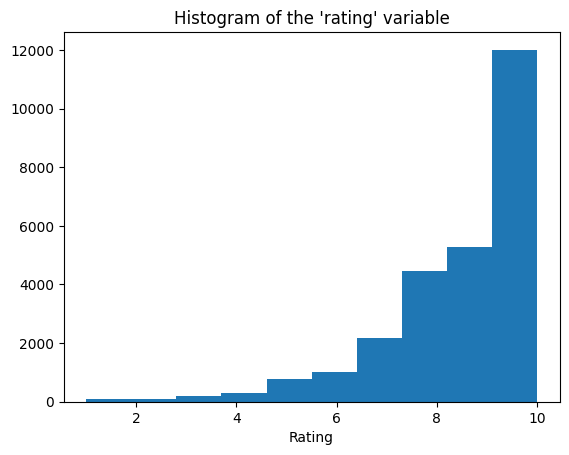

In [59]:
plt.hist(df2.rating)
plt.title("Histogram of the 'rating' variable")
plt.xlabel("Rating")
plt.show()

In [60]:
df2.groupby("review_text").count().sort_values("review_title", ascending=False).head(10)

,review_title,rating
review_text,,
There are no comments available for this review,7687,7687
Location,29,29
"Nothing,\n\nEverything",27,27
Everything,20,20
"Nothing ,\n\nEverything",12,12
Great location,10,10
Breakfast,6,6
Excellent,6,6
"nothing,\n\neverything",6,6


In [61]:
df2.review_text = df2.review_text.apply(lambda x: x if x != "There are no comments available for this review" else "")
df2.groupby("review_text").count().sort_values("review_title", ascending=False).head(10)

,review_title,rating
review_text,,
,7687,7687
Location,29,29
"Nothing,\n\nEverything",27,27
Everything,20,20
"Nothing ,\n\nEverything",12,12
Great location,10,10
Breakfast,6,6
Excellent,6,6
"nothing,\n\neverything",6,6


from matplotlib import pyplot as plt
_df_24['review_title'].plot(kind='hist', bins=20, title='review_title')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='review_title', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['review_title'].plot(kind='line', figsize=(8, 4), title='review_title')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [62]:
df2['final_review'] = df2.review_title +". " + df2.review_text

In [63]:
df3 = (
    df2
    .drop(columns = ['review_title', 'review_text'])
    [['final_review', 'rating']]
    .copy()
    .dropna()
    .reset_index(drop=True)
)
df3.head()

,final_review,rating
0,"Exceptional. Everything was perfect! Quite, co...",10.0
1,I highly recommend this b&b! We enjoyed it a l...,9.0
2,Exceptional. It was just what we wanted for a ...,10.0
3,My stay in the house was a experiencing bliss ...,10.0
4,One bedroom apartment with wonderful view and ...,9.2


In [64]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import mean_absolute_error

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [65]:
vader_score = []
for i in tqdm(df3.final_review):
    vader_score.append(analyser.polarity_scores(i)['compound'])
df3['vader_score'] = vader_score

100%|██████████| 26385/26385 [00:13<00:00, 1929.14it/s]


In [66]:
df3

,final_review,rating,vader_score
0,"Exceptional. Everything was perfect! Quite, co...",10.0,0.7840
1,I highly recommend this b&b! We enjoyed it a l...,9.0,0.9344
2,Exceptional. It was just what we wanted for a ...,10.0,0.7152
3,My stay in the house was a experiencing bliss ...,10.0,0.9816
4,One bedroom apartment with wonderful view and ...,9.2,0.9835
...,...,...,...
26380,Good stay. Had a room with the view to the mai...,8.8,0.9211
26381,"Exceptional. There was nothing not to like. ,\...",10.0,0.6727
26382,Good. Poor internet connection and aircon in r...,7.9,-0.0767
26383,Very good.,8.3,0.4927


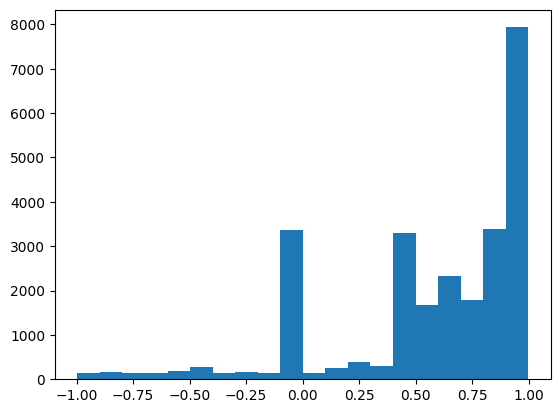

In [67]:
plt.hist(df3.vader_score, bins=20)
plt.show()

In [68]:
pred_rating = df3.assign(predicted_rating = lambda x: (x.vader_score + 1)*5)
pred_rating

,final_review,rating,vader_score,predicted_rating
0,"Exceptional. Everything was perfect! Quite, co...",10.0,0.7840,8.9200
1,I highly recommend this b&b! We enjoyed it a l...,9.0,0.9344,9.6720
2,Exceptional. It was just what we wanted for a ...,10.0,0.7152,8.5760
3,My stay in the house was a experiencing bliss ...,10.0,0.9816,9.9080
4,One bedroom apartment with wonderful view and ...,9.2,0.9835,9.9175
...,...,...,...,...
26380,Good stay. Had a room with the view to the mai...,8.8,0.9211,9.6055
26381,"Exceptional. There was nothing not to like. ,\...",10.0,0.6727,8.3635
26382,Good. Poor internet connection and aircon in r...,7.9,-0.0767,4.6165
26383,Very good.,8.3,0.4927,7.4635


In [69]:
print(f"MAE: {mean_absolute_error(pred_rating.rating, pred_rating.predicted_rating)}")

MAE: 1.5743862611332196


In [70]:
errors_examining = pred_rating.assign(abs_error = lambda x: abs(x.rating - x.predicted_rating)).sort_values("abs_error", ascending=False).reset_index(drop=True)
errors_examining.head(10)

,final_review,rating,vader_score,predicted_rating,abs_error
0,"Exceptional. Nothing,\n\nGreat location. Beaut...",10.0,-0.9190,0.4050,9.5950
1,"Exceptional. Nothing ,\n\nExcellent staff, exc...",10.0,-0.8399,0.8005,9.1995
2,Exceptional. Staff was really nice and the bre...,10.0,-0.8366,0.8170,9.1830
3,"Exceptional. Nothing,\n\nVery clean, excellent...",10.0,-0.8352,0.8240,9.1760
4,Exceptional. Its a little old but thats the ba...,10.0,-0.8047,0.9765,9.0235
5,Exceptional. The toilet had a strange smell. T...,10.0,-0.7777,1.1115,8.8885
6,"Exceptional. Nothing,\n\nLocation was great\nB...",10.0,-0.7641,1.1795,8.8205
7,"Exceptional. Nothing,\n\nGreat. Location, gorg...",10.0,-0.7589,1.2055,8.7945
8,"Exceptional. None,\n\nGreat location, amazing ...",10.0,-0.7481,1.2595,8.7405
9,"Exceptional. Nothing ,\n\nAmazing place, amazi...",10.0,-0.7306,1.3470,8.6530


In [71]:
errors_examining.final_review[0]

'Exceptional. Nothing,\n\nGreat location. Beautiful rooms. Great food. Great staff'

,final_review,rating,vader_score,sentiment
0,"Exceptional. Everything was perfect! Quite, co...",10.0,0.7840,positive
1,I highly recommend this b&b! We enjoyed it a l...,9.0,0.9344,positive
2,Exceptional. It was just what we wanted for a ...,10.0,0.7152,positive
3,My stay in the house was a experiencing bliss ...,10.0,0.9816,positive
4,One bedroom apartment with wonderful view and ...,9.2,0.9835,positive
...,...,...,...,...
26380,Good stay. Had a room with the view to the mai...,8.8,0.9211,positive
26381,"Exceptional. There was nothing not to like. ,\...",10.0,0.6727,positive
26382,Good. Poor internet connection and aircon in r...,7.9,-0.0767,neutral
26383,Very good.,8.3,0.4927,neutral


In [72]:
def scale_vader(x):
    if x <=-0.5:
        return "negative"
    elif x>=0.5:
        return "positive"
    else:
        return "neutral"

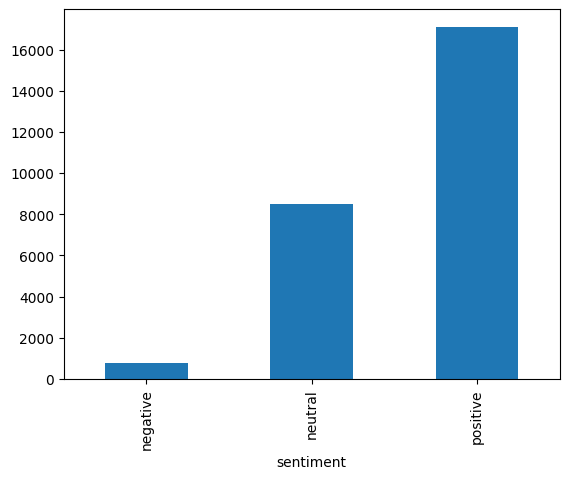

In [74]:
df3.groupby('sentiment').size().plot(kind='bar')
plt.show()

In [75]:
from wordcloud import WordCloud,STOPWORDS

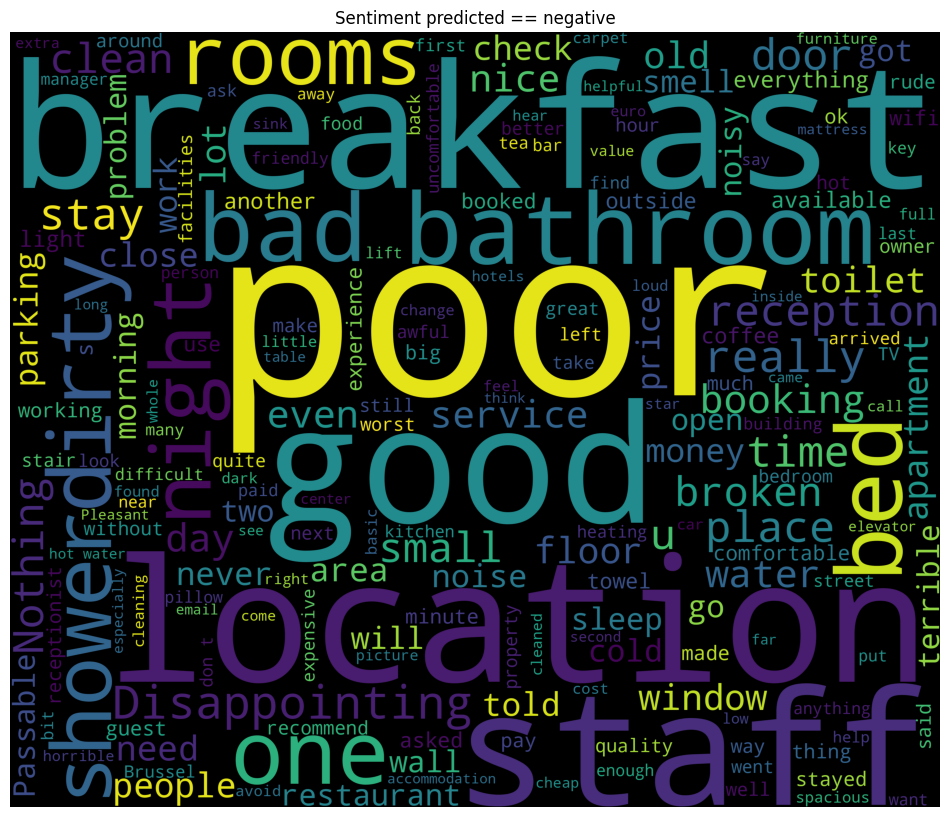

In [76]:
df_wc = df3[df3['sentiment']=='negative']

words = ' '.join(df_wc['final_review'])
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS)
stopwords.add("hotel")
stopwords.add("room")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Sentiment predicted == negative")
plt.axis('off')
plt.show()

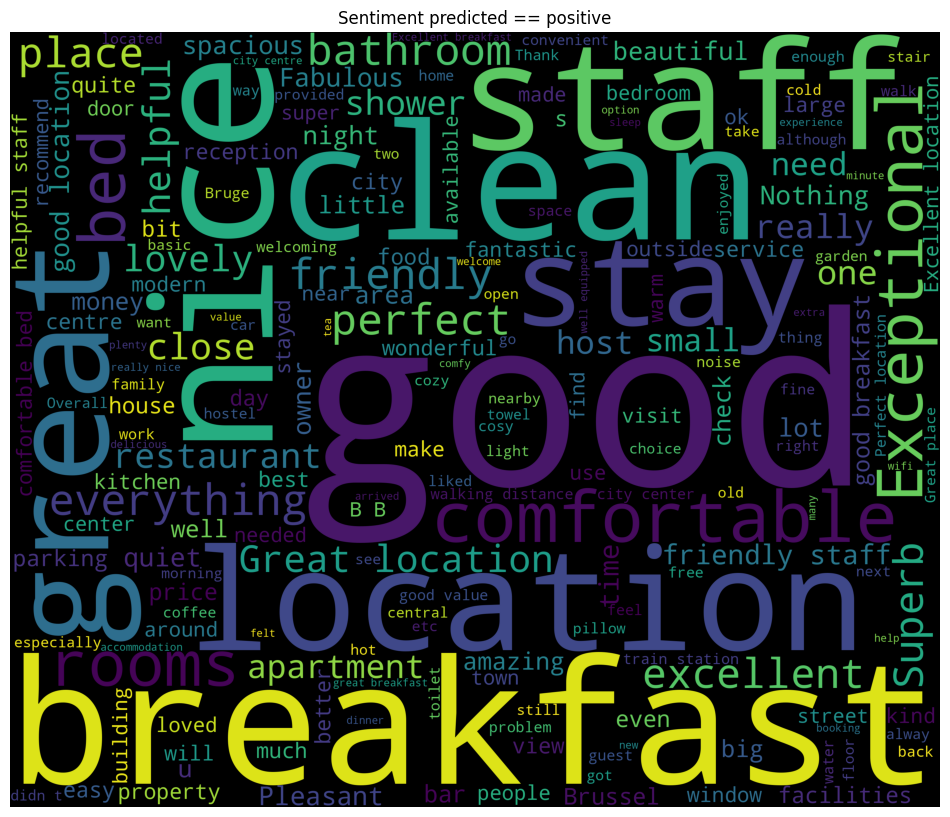

In [77]:
df_wc = df3[df3['sentiment']=='positive']

words = ' '.join(df_wc['final_review'])
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS)
stopwords.add("hotel")
stopwords.add("room")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Sentiment predicted == positive")
plt.axis('off')
plt.show()

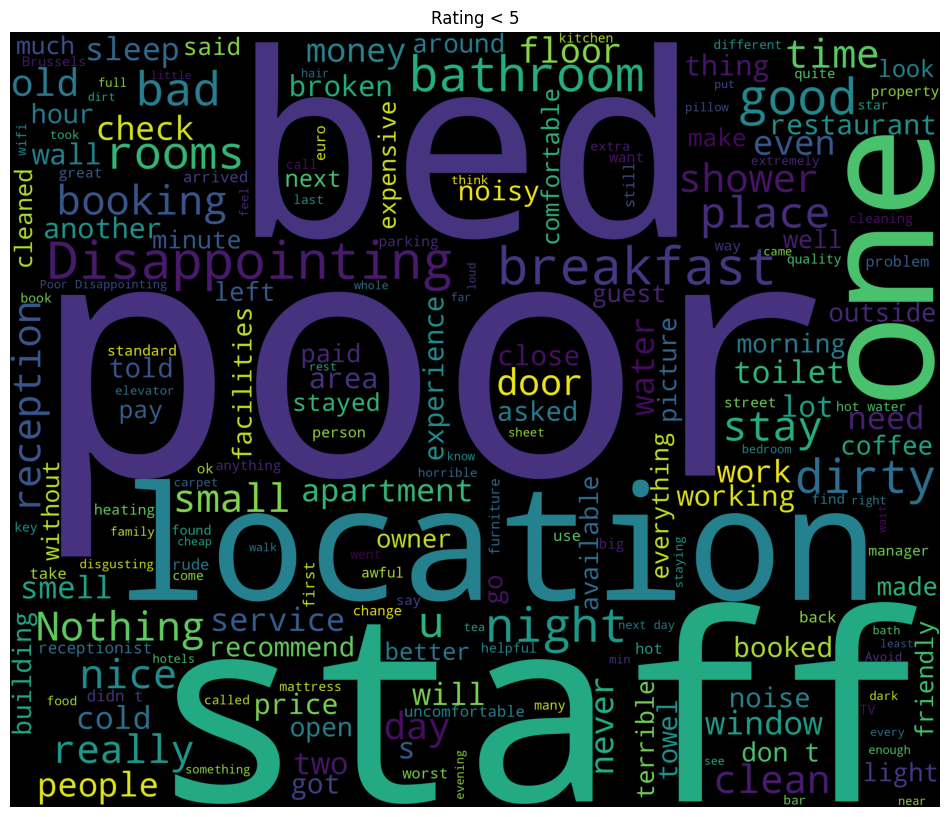

In [81]:
df_wc = df3[df3['rating']<5]

words = ' '.join(df_wc['final_review'])
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS)
stopwords.add("hotel")
stopwords.add("room")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Rating < 5")
plt.axis('off')
plt.show()

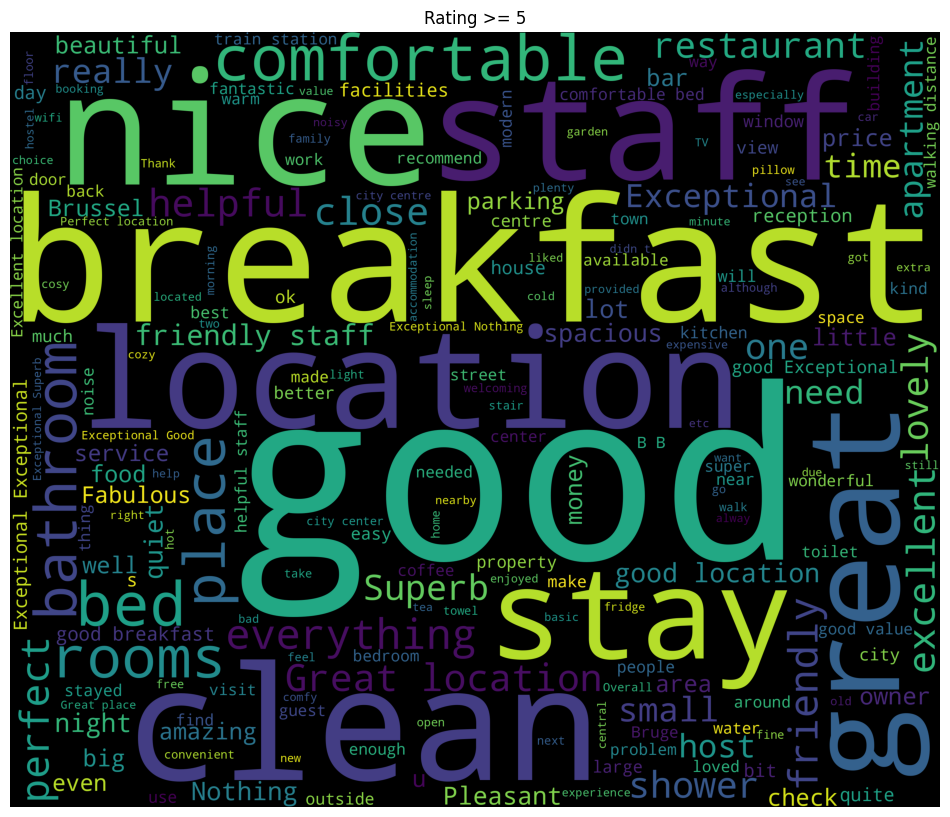

In [79]:
df_wc = df3[df3['rating']>=5]

words = ' '.join(df_wc['final_review'])
cleaned_word = " ".join([word for word in words.split()])

stopwords = set(STOPWORDS)
stopwords.add("hotel")
stopwords.add("room")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.title("Rating >= 5")
plt.axis('off')
plt.show()